# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


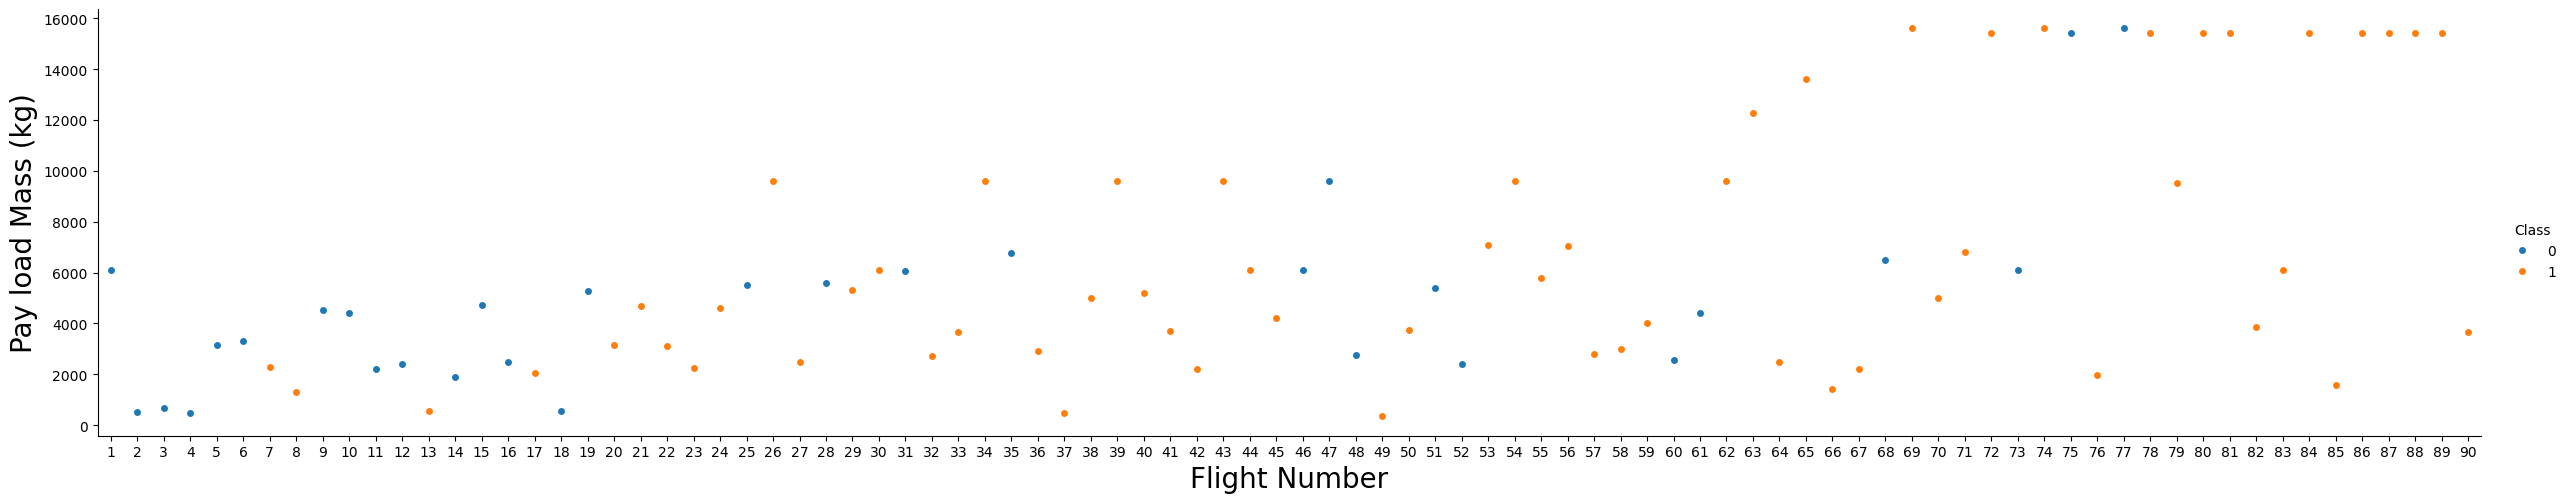

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Visualize the relationship between Flight Number and Launch Site


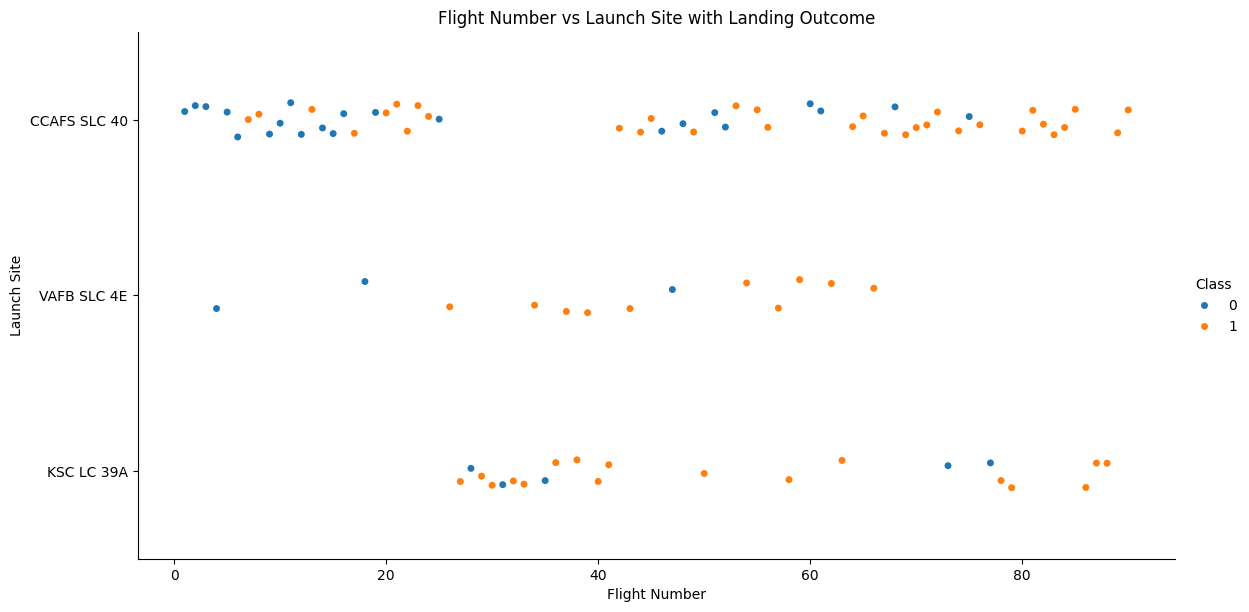

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize FlightNumber vs LaunchSite colored by Class
sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    data=df,
    aspect=2,
    height=6
)

plt.title("Flight Number vs Launch Site with Landing Outcome")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.show()


### Visualize the relationship between Payload Mass and Launch Site


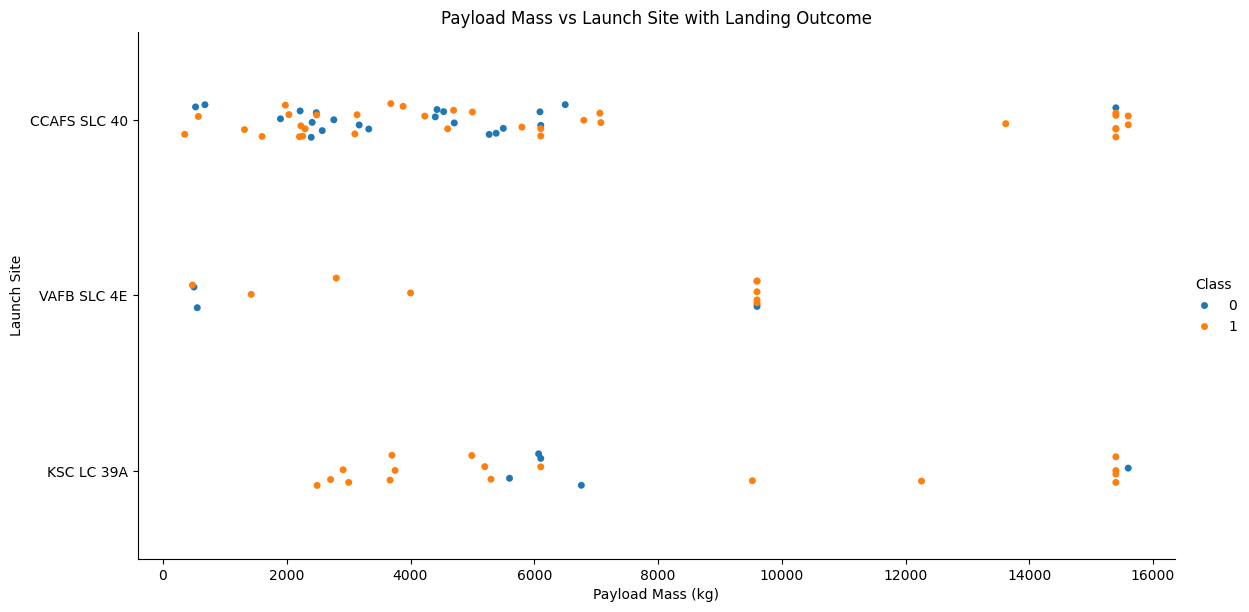

In [ ]:
sns.catplot(
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    data=df,
    aspect=2,
    height=6
)

plt.title("Payload Mass vs Launch Site with Landing Outcome")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.show()

### Visualize the relationship between success rate of each orbit type


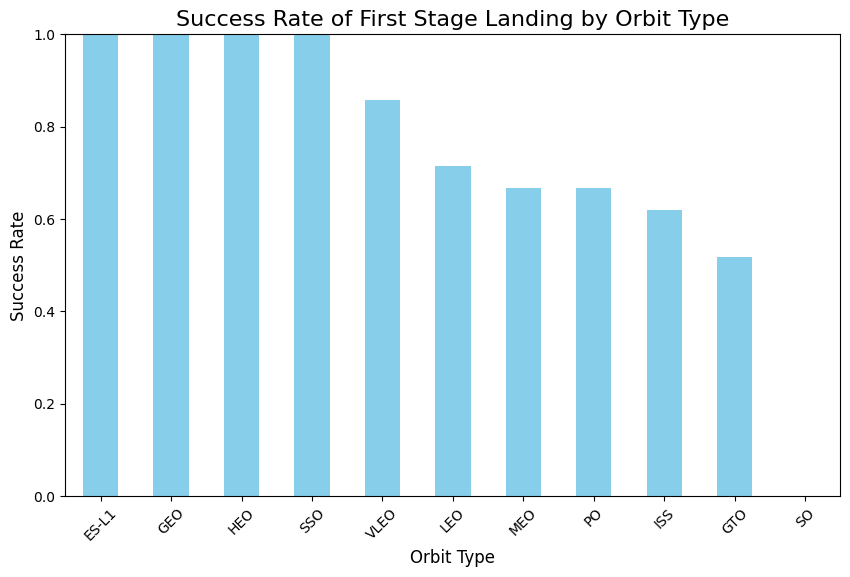

In [ ]:
orbit_success_rate = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)

# Plot the success rate
plt.figure(figsize=(10,6))
orbit_success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate of First Stage Landing by Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

### Visualize the relationship between FlightNumber and Orbit type


<Figure size 1200x600 with 0 Axes>

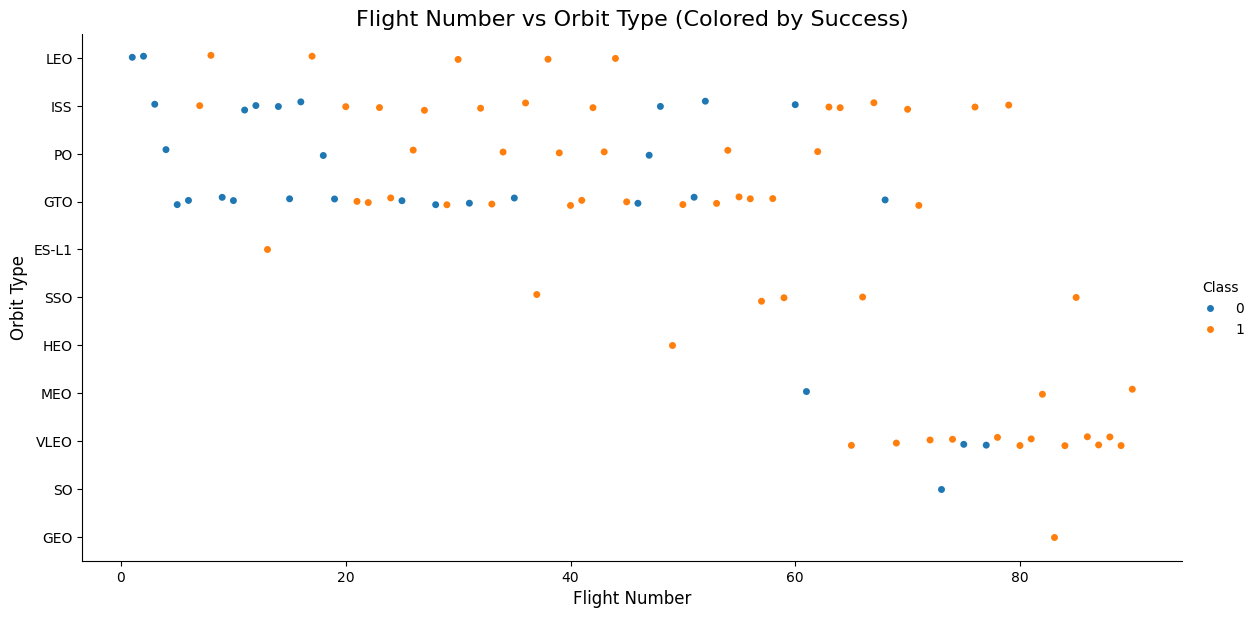

In [ ]:
plt.figure(figsize=(12,6))

# Create a categorical plot
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2, height=6, kind="strip", jitter=True)
plt.title("Flight Number vs Orbit Type (Colored by Success)", fontsize=16)
plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Orbit Type", fontsize=12)
plt.show()

### Visualize the relationship between Payload Mass and Orbit type


<Figure size 1200x600 with 0 Axes>

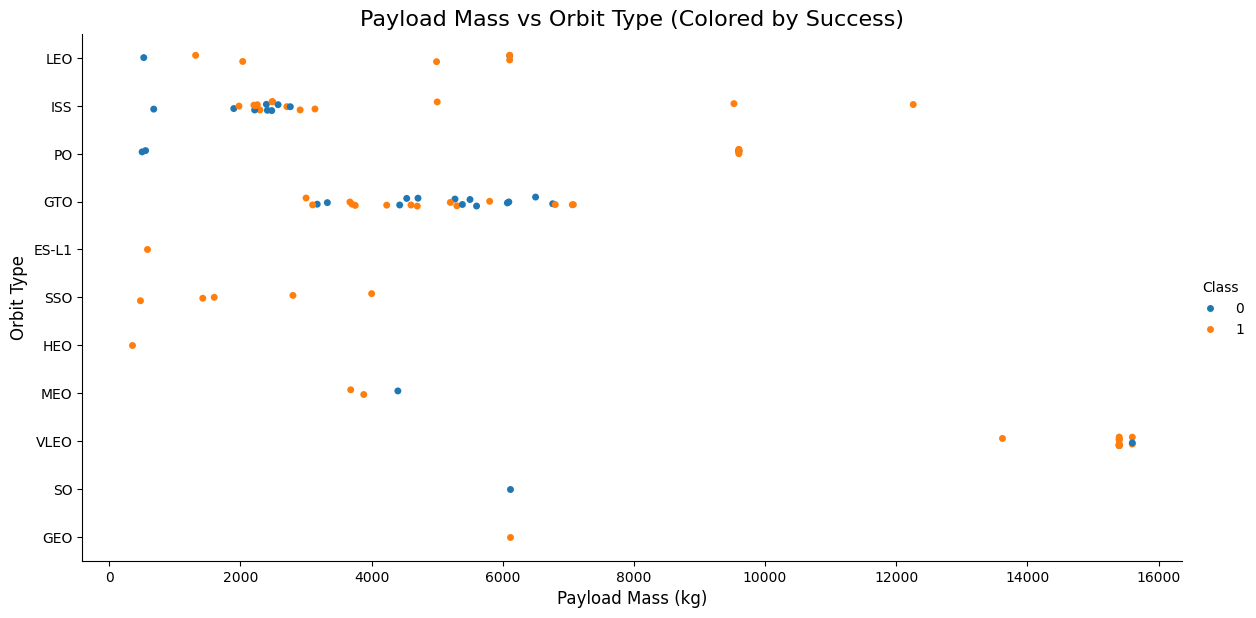

In [ ]:
plt.figure(figsize=(12,6))

# Scatter/strip plot for PayloadMass vs Orbit
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, kind="strip", jitter=True, aspect=2, height=6)
plt.title("Payload Mass vs Orbit Type (Colored by Success)", fontsize=16)
plt.xlabel("Payload Mass (kg)", fontsize=12)
plt.ylabel("Orbit Type", fontsize=12)
plt.show()

### Visualize the launch success yearly trend


In [9]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


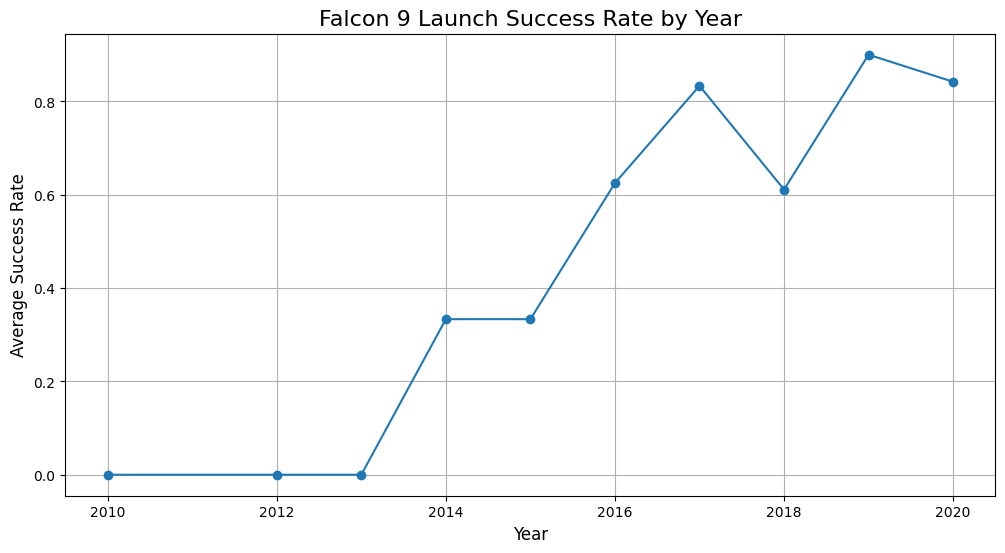

In [ ]:
# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year
df['Year'] = df['Date'].dt.year

# Calculate average success rate per year
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(12,6))
plt.plot(yearly_success['Year'], yearly_success['Class'], marker='o', linestyle='-')
plt.title('Falcon 9 Launch Success Rate by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Success Rate', fontsize=12)
plt.grid(True)
plt.show()

## Features Engineering


In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Create dummy variables to categorical columns


In [ ]:
# List of categorical columns to encode
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Create one-hot encoded dataframe
features_one_hot = pd.get_dummies(df, columns=categorical_columns)

# Display first few rows
features_one_hot.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-01-01,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2012-01-01,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013-01-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2013-01-01,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2013-01-01,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False


### Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [16]:
numeric_cols = features_one_hot.select_dtypes(include=[np.number]).columns
features_numeric = features_one_hot[numeric_cols].astype('float64')

# Check
features_numeric.head()
features_numeric.dtypes

FlightNumber    float64
Date            float64
PayloadMass     float64
Flights         float64
Block           float64
ReusedCount     float64
Longitude       float64
Latitude        float64
Class           float64
Year            float64
dtype: object

In [18]:
df.shape

(90, 19)

In [ ]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)